# import lib

In [3]:
import pandas
import psycopg2
import configparser

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# connect to db

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [5]:
cur=conn.cursor()

# q1

In [6]:
q1_sql = """
            select * from gp14.student
            """

In [7]:
df = pandas.read_sql_query(q1_sql,conn)
df[:]

,s_email,s_name,major
0,rendalr@jmu.edu,Lauryn Renda,IA
1,getzaj@jmu.edu,Alyssa Getz,IA
2,pichaem@jmu.edu,Elizabeth Picha,IA
3,roberttl@jmu.edu,Thea Robertson,IA
4,laneth@jmu.edu,Thomas Lane,IA
5,stetinjr@jmu.edu,Jenna Stetina,IA


# q2

In [8]:
q2_sql = """
        select gp14.professor.p_name,
        gp14.course.c_name
        from gp14.professor
        inner join gp14.course
        on gp14.professor.p_email = gp14.course.p_email
        """

In [9]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,Noel Hendrickson,Counterfactual Reasoning
1,Stephen Marrin,Seminar
2,Noel Hendrickson,Causal Analysis
3,p_new_n,c_new_name
4,p_new_n,Data mining
5,p_new_n,Money Laundering


# q3

In [10]:
q3_sql = """
        select c_number,
        count(c_number) as num_enroll
        from gp14.enroll_list
        group by c_number
        """

In [11]:
df=pandas.read_sql_query(q3_sql,conn)
df[:]

,c_number,num_enroll
0,ia313,2
1,ia312,2
2,ia340,3
3,ia300,3


Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='c_number'>

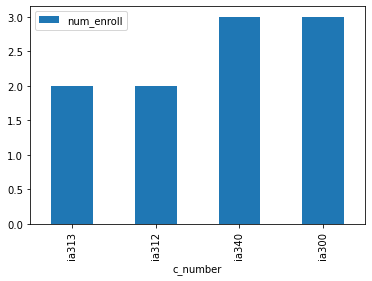

In [12]:
df.plot.bar(x='c_number',y='num_enroll')

# q4

In [13]:
q4_sql = """
        select gp14.professor.p_name,
        count(gp14.course.c_name) as num_course
        from gp14.professor
        inner join gp14.course
        on gp14.professor.p_email = gp14.course.p_email
        group by gp14.professor.p_name
        """

In [14]:
df=pandas.read_sql_query(q4_sql,conn)
df[:]

,p_name,num_course
0,Noel Hendrickson,2
1,p_new_n,3
2,Stephen Marrin,1


<AxesSubplot:xlabel='p_name'>

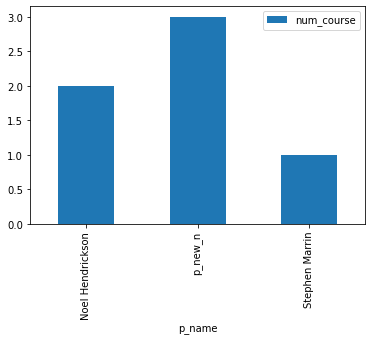

In [15]:
df.plot.bar(x='p_name',y='num_course')

# q5

In [16]:
q5_insert_professor_sql = """
            insert into gp14.professor(p_email,p_name,p_office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into gp14.professor(p_email,p_name,p_office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [17]:
cur.execute(q5_insert_professor_sql)

In [18]:
conn.commit()

In [19]:
df=pandas.read_sql_query('select * from gp14.professor',conn)
df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu,Noel Hendrickson,125
1,bortolzj@jmu.edu,Zachary Bortolot,126
2,marrinsp@jmu.edu,Stephen Marrin,127
3,p_new_e,p_new_n,)_new_o
4,new_lab4_email,new_p_lab4_name,new_lab4_o


In [20]:
q5_insert_course_sql = """
            insert into gp14.course(c_number,c_name,c_room,p_email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
print(q5_insert_course_sql)


            insert into gp14.course(c_number,c_name,c_room,p_email)
            values('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
            


In [21]:
cur.execute(q5_insert_course_sql)

In [22]:
conn.commit()

In [23]:
df=pandas.read_sql_query('select * from gp14.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,ia313,Counterfactual Reasoning,engeo 2010,hendrinx@jmu.edu
1,ia300,Seminar,isat 124,marrinsp@jmu.edu
2,ia312,Causal Analysis,isat 120,hendrinx@jmu.edu
3,c_new_n,c_new_name,c_new_r,p_new_e
4,ia340,Data mining,engeo 2005,p_new_e
5,ia480,Money Laundering,engeo 2050,p_new_e
6,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


# q6

In [ ]:
q6_update_course_sql ="""
                    update gp14.course
                    set p_email = '{}'
                    where p_email ='{}'
                    """.format('new_lab4_email','t2@jmu.edu')

In [ ]:
cur.execute(q6_update_course_sql)

In [ ]:
conn.commit()

In [28]:
df=pandas.read_sql_query('select * from gp14.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,ia313,Counterfactual Reasoning,engeo 2010,hendrinx@jmu.edu
1,ia300,Seminar,isat 124,marrinsp@jmu.edu
2,ia312,Causal Analysis,isat 120,hendrinx@jmu.edu
3,c_new_n,c_new_name,c_new_r,p_new_e
4,ia340,Data mining,engeo 2005,p_new_e
5,ia480,Money Laundering,engeo 2050,p_new_e
6,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [29]:
q6_delete_professor_sql = """
                            delete from gp14.professor
                            where p_email='{}'
                            """.format('t2@jmu.edu')

In [30]:
cur.execute(q6_delete_professor_sql)

In [31]:
conn.commit()

In [32]:
df=pandas.read_sql_query('select * from gp14.professor',conn)
df[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu,Noel Hendrickson,125
1,bortolzj@jmu.edu,Zachary Bortolot,126
2,marrinsp@jmu.edu,Stephen Marrin,127
3,p_new_e,p_new_n,)_new_o
4,new_lab4_email,new_p_lab4_name,new_lab4_o


In [33]:
cur.close()

In [34]:
conn.close()